# Setup jupyter notebook interactive plots

In [1]:
# Make plotting interative in the notebook.
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

# Create a BlueSky 'RunEngine'

In [2]:
# Create a RunEngine.
from bluesky import RunEngine
RE = RunEngine({})

# Setup 'BestEffortCallback to guess how to display scans

In [3]:
from bluesky.callbacks.best_effort import BestEffortCallback
RE.subscribe(BestEffortCallback())

0

# Example: Motor and AI objects

In [4]:
from ophyd.alssignal import ALSMotor, ALSAI
fakemotor = ALSMotor('fake')
monitor = ALSAI('Current Monitor 1')

In [5]:
monitor.get()

0.050474

In [6]:
import time
status=fakemotor.set(3.14)
print(status)
time.sleep(1)
print(status)
fakemotor.get()

Status(obj=ALSDACSignal(name='fake'), done=False, success=False)
Status(obj=ALSDACSignal(name='fake'), done=True, success=True)


3.14

# Example: scans

Transient Scan ID: 2     Time: 2017/12/18 14:06:30
Persistent Unique Scan ID: '00cbd367-f141-4530-8608-a4f5a2b3b718'
New stream: 'primary'
+-----------+------------+------------+-------------------+
|   seq_num |       time |       fake | Current Monitor 1 |
+-----------+------------+------------+-------------------+


<IPython.core.display.Javascript object>


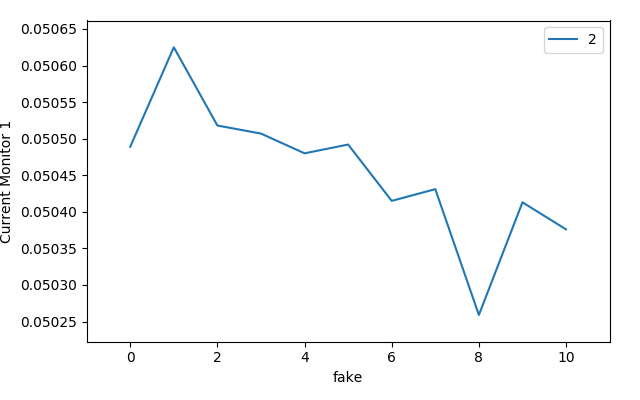

|         1 | 14:06:30.4 |      0.000 |             0.050 |
|         2 | 14:06:30.7 |      1.000 |             0.051 |
|         3 | 14:06:31.0 |      2.000 |             0.051 |
|         4 | 14:06:31.3 |      3.000 |             0.051 |
|         5 | 14:06:31.7 |      4.000 |             0.050 |
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Deferred pause acknowledged. Continuing to checkpoint.
|         6 | 14:06:31.9 |      5.000 |             0.050 |
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


In [8]:
from bluesky.plans import scan, count
from bluesky.callbacks import LiveTable, LivePlot
RE(scan([monitor], fakemotor, 0, 10, 11, md={'sample_name':'Fake Sample 1'}))

In [9]:
RE.resume()

|         7 | 14:06:38.1 |      6.000 |             0.050 |
|         8 | 14:06:38.3 |      7.000 |             0.050 |
|         9 | 14:06:38.6 |      8.000 |             0.050 |
|        10 | 14:06:38.9 |      9.000 |             0.050 |
|        11 | 14:06:39.2 |     10.000 |             0.050 |
+-----------+------------+------------+-------------------+
generator scan ['00cbd3'] (scan num: 2)





['00cbd367-f141-4530-8608-a4f5a2b3b718']

# Example: Suspenders and Callbacks

In [10]:
from bluesky.suspenders import SuspendFloor
sus = SuspendFloor(monitor, 0.0503, sleep=1)
RE.install_suspender(sus)

Transient Scan ID: 3     Time: 2017/12/18 14:07:59
Persistent Unique Scan ID: 'f27aebce-3511-4dc5-a0d0-6bdafa308fdc'
New stream: 'primary'
+-----------+------------+-------------------+
|   seq_num |       time | Current Monitor 1 |
+-----------+------------+-------------------+


<IPython.core.display.Javascript object>


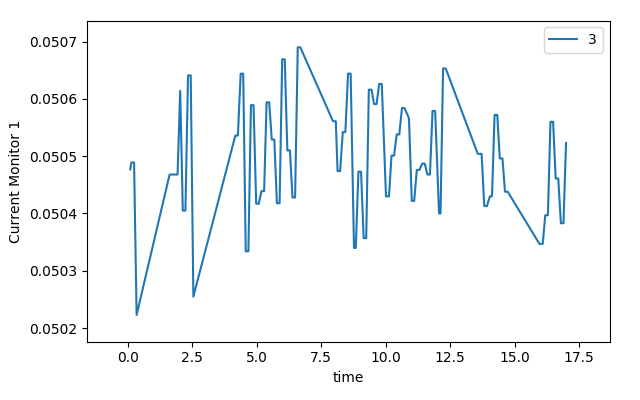

|         1 | 14:07:59.2 |             0.050 |
|         2 | 14:07:59.2 |             0.050 |
|         3 | 14:07:59.3 |             0.050 |
|         4 | 14:07:59.4 |             0.050 |
Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2017-12-18 14:07:59.
Justification for this suspension:
Signal Current Monitor 1 = 0.050223 is below 0.0503
Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 14:08:00.
|         4 | 14:08:00.7 |             0.050 |
|         5 | 14:08:00.9 |             0.050 |
|         6 | 14:08:01.0 |             0.050 |
|         7 | 14:08:01.1 |             0.051 |
|         8 | 14:08:01.2 |             0.050 |
|         9 | 14:08:01.3 |             0.050 |
|        10 | 14:08:01.4 |             0.051 |
|        11 | 14:08:01.5 |             0.051 |
|        12 | 14:08:

Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2017-12-18 14:08:17.
Justification for this suspension:
Signal Current Monitor 1 = 0.050273 is below 0.0503
Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 14:08:18.
Suspending....To get prompt hit Ctrl-C twice to pause.
Suspension occurred at 2017-12-18 14:08:17.
Justification for this suspension:
Signal Current Monitor 1 = 0.050293 is below 0.0503
Suspender SuspendFloor(ALSAI(name='Current Monitor 1'), sleep=1, pre_plan=None, post_plan=None,tripped_message=) reports a return to nominal conditions. Will sleep for 1 seconds and then release suspension at 2017-12-18 14:08:18.


('f27aebce-3511-4dc5-a0d0-6bdafa308fdc',)

In [11]:
RE(count([monitor], num=100, delay=.1))

In [ ]:
monitor.subscribe(lambda value,**kwargs:print(value))

# Example: REAL motor

In [12]:
from ophyd.alssignal import ALSMotor, ALSAI
loadmotor = ALSMotor('Loading Stage um No Parenth')
loadmotor.set(27960)


RuntimeError: Another set() call is still in progress

In [13]:
loadmotor.set(27950)

Status(obj=ALSDACSignal(name='Loading Stage um No Parenth'), done=False, success=False)